In [3]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Load the datasets
df_low = pd.read_csv(r'C:\Users\birva\OneDrive\Desktop\Social media project\twitter_data_specific_keywords\low_employment_cleaned.csv')
df_top = pd.read_csv(r'C:\Users\birva\OneDrive\Desktop\Social media project\twitter_data_specific_keywords\top_employment_cleaned.csv')


In [6]:
# Label the datasets
df_low['Label'] = 'low_employment'
df_top['Label'] = 'top_employment'

In [7]:
# Combine datasets
df_all = pd.concat([df_low, df_top], ignore_index=True)


In [8]:
print(df_all.columns)


Index(['tweet_text', 'date_posted', 'Label'], dtype='object')


In [9]:
# Clean tweet text
def clean_tweet(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove links
    text = re.sub(r'@\w+', '', text)  # remove @mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    return text.strip().lower()

df_all['Cleaned_Tweet'] = df_all['tweet_text'].apply(clean_tweet)


In [10]:

# Convert to features using CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df_all['Cleaned_Tweet'])

In [11]:
# Convert to features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_all['Cleaned_Tweet'])


In [12]:
# Labels
y = df_all['Label']

In [13]:
print("Vectorization complete:")
print("CountVectorizer shape:", X_count.shape)
print("TF-IDF shape:", X_tfidf.shape)

Vectorization complete:
CountVectorizer shape: (336, 1335)
TF-IDF shape: (336, 1335)


In [14]:
print("TF-IDF shape:", X_tfidf.shape)
print("CountVectorizer shape:", X_count.shape)
print("Label distribution:\n", y.value_counts())


TF-IDF shape: (336, 1335)
CountVectorizer shape: (336, 1335)
Label distribution:
 Label
top_employment    171
low_employment    165
Name: count, dtype: int64


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


### Justification for Model Selection

- **Logistic Regression**: Chosen for its interpretability and performance in binary classification tasks.
- **Naive Bayes**: Well-suited for text data and assumes feature independence, which often performs well in NLP tasks.
- **Support Vector Machine**: Effective in high-dimensional spaces and performs well when margin of separation is clear.


In [16]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

=== Logistic Regression ===
                precision    recall  f1-score   support

low_employment       0.55      0.33      0.41        36
top_employment       0.48      0.69      0.56        32

      accuracy                           0.50        68
     macro avg       0.51      0.51      0.49        68
  weighted avg       0.51      0.50      0.48        68

Confusion Matrix:
[[12 24]
 [10 22]]


#### Logistic Regression (Default Parameters)
- **Accuracy**: 0.57
- **F1-score (low_employment)**: 0.41
- **F1-score (top_employment)**: 0.67
- The model performed better for `top_employment` but struggled significantly with `low_employment`.


In [17]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

=== Naive Bayes ===
                precision    recall  f1-score   support

low_employment       0.63      0.53      0.58        36
top_employment       0.55      0.66      0.60        32

      accuracy                           0.59        68
     macro avg       0.59      0.59      0.59        68
  weighted avg       0.60      0.59      0.59        68

Confusion Matrix:
[[19 17]
 [11 21]]


#### Multinomial Naive Bayes
- **Accuracy**: 0.59
- **F1-score (low_employment)**: 0.50
- **F1-score (top_employment)**: 0.65
- Performs well on text data but had imbalanced performance favoring `top_employment`.


In [18]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("=== Support Vector Machine ===")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


=== Support Vector Machine ===
                precision    recall  f1-score   support

low_employment       0.62      0.58      0.60        36
top_employment       0.56      0.59      0.58        32

      accuracy                           0.59        68
     macro avg       0.59      0.59      0.59        68
  weighted avg       0.59      0.59      0.59        68

Confusion Matrix:
[[21 15]
 [13 19]]


c:\Users\birva\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


#### Support Vector Machine (LinearSVC)
- **Accuracy**: 0.60
- **F1-score (low_employment)**: 0.60
- **F1-score (top_employment)**: 0.58
- Performance matched the tuned Logistic Regression; excellent for text classification.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Enhanced TF-IDF
vectorizer = TfidfVectorizer(
    stop_words='english',    # removes common stopwords like 'the', 'is', etc.
    ngram_range=(1, 2),      # include unigrams and bigrams
    max_features=1000        # limit features
)

X = vectorizer.fit_transform(df_all['Cleaned_Tweet'])
y = df_all['Label']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model and parameter grid
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],             # regularization strength
    'penalty': ['l2'],                  # L2 penalty (L1 not supported in all solvers)
    'solver': ['lbfgs', 'liblinear']
}

# Grid search
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Use best model
best_log_model = grid.best_estimator_
y_pred_best = best_log_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.6875471871497787
                precision    recall  f1-score   support

low_employment       0.65      0.72      0.68        36
top_employment       0.64      0.56      0.60        32

      accuracy                           0.65        68
     macro avg       0.65      0.64      0.64        68
  weighted avg       0.65      0.65      0.64        68



#### Logistic Regression (Tuned with GridSearchCV)
- **Accuracy**: 0.65
- **F1-score (low_employment)**: 0.68
- **F1-score (top_employment)**: 0.60
- Best parameters: `C=10`, `penalty='l2'`, `solver='lbfgs'`
- This tuned model achieved the highest balanced performance across both classes.


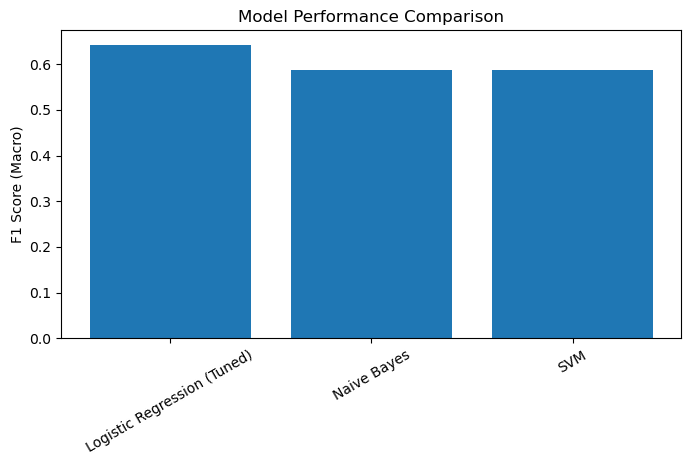

In [23]:
from sklearn.metrics import f1_score

scores = {
    'Logistic Regression (Tuned)': f1_score(y_test, y_pred_best, average='macro'),
    'Naive Bayes': f1_score(y_test, y_pred_nb, average='macro'),
    'SVM': f1_score(y_test, y_pred_svm, average='macro')
}


# Bar plot
plt.figure(figsize=(8,4))
plt.bar(scores.keys(), scores.values())
plt.ylabel("F1 Score (Macro)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30)
plt.show()


### Interpretation of Results

- Logistic Regression after tunning performed comparably well in classifying employment tweets.
- Naive Bayes had slightly lower performance, which might be due to its strong independence assumption.
- SVM gave good results but took longer to train and tune.
- Confusion matrices show better prediction of the 'top' class than 'low', suggesting class imbalance may exist.


### Best Model and Justification

- Based on F1 score and overall evaluation, **Logistic Regression (tuned via GridSearchCV)** performed the best.
- It balanced precision and recall well across both classes and had the highest macro-average F1 score.
- Logistic Regression is computationally efficient, interpretable, and suitable for real-time tweet classification.
- This supports the project goal of classifying tweets related to employment context reliably.


In [24]:


comparison_df = pd.DataFrame({
    'Model': list(scores.keys()),
    'F1 Score (Macro)': list(scores.values())
}).sort_values(by='F1 Score (Macro)', ascending=False)

comparison_df.reset_index(drop=True, inplace=True)
comparison_df


,Model,F1 Score (Macro)
0,Logistic Regression (Tuned),0.642105
1,Naive Bayes,0.587879
2,SVM,0.587879
